In [28]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [29]:
def order_book(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/High_Frequency_Trading_Strategy_using_machine_learning/Limit_Order_Book_Best_3/order_book_3_2014'\
                + '_' + str(month) + '_' + str(day) + '.csv'
    order_book = pd.read_csv(datapath,sep=',')
    bid_price_1 = np.array(map(float,order_book['Bid'][1::4]))/100.0
    bid_price_2 = np.array(map(float,order_book['Bid'][2::4]))/100.0
    bid_price_3 = np.array(map(float,order_book['Bid'][3::4]))/100.0
    timestamp = np.array(order_book['Bid_Quantity'][0::4])
    bid_quantity_1 = np.array(map(float,order_book['Bid_Quantity'][1::4]))
    bid_quantity_2 = np.array(map(float,order_book['Bid_Quantity'][2::4]))
    bid_quantity_3 = np.array(map(float,order_book['Bid_Quantity'][3::4]))
    ask_price_1 = np.array(map(float,order_book['Ask'][1::4]))/100.0
    ask_price_2 = np.array(map(float,order_book['Ask'][2::4]))/100.0
    ask_price_3 = np.array(map(float,order_book['Ask'][3::4]))/100.0
    ask_quantity_1 = np.array(map(float,order_book['Ask_Quantity'][1::4]))
    ask_quantity_2 = np.array(map(float,order_book['Ask_Quantity'][2::4]))
    ask_quantity_3 = np.array(map(float,order_book['Ask_Quantity'][3::4]))
    
    bid_quantity_1[isnan(bid_quantity_1)] = 0
    bid_quantity_2[isnan(bid_quantity_2)] = 0
    bid_quantity_3[isnan(bid_quantity_3)] = 0
    ask_quantity_1[isnan(ask_quantity_1)] = 0
    ask_quantity_2[isnan(ask_quantity_2)] = 0
    ask_quantity_3[isnan(ask_quantity_3)] = 0
    
    return timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,bid_quantity_1,\
            bid_quantity_2,bid_quantity_3,ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
            ask_quantity_2,ask_quantity_3

In [30]:
def time_transform(timestamp_time):
    time_second_basic = []
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600+\
                    float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60+\
                    float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second_basic.append(second - 32400.0)
        time_second.append(second)
    return np.array(time_second),np.array(time_second_basic)

In [31]:
def weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3):
    
    Weight_Ask = (w1 * ask_quantity_1 + w2 * ask_quantity_2 + w3 * ask_quantity_3)
    Weight_Bid = (w1 * bid_quantity_1 + w2 * bid_quantity_2 + w3 * bid_quantity_3)
    W_AB = Weight_Ask/Weight_Bid
    W_A_B = (Weight_Ask - Weight_Bid)/(Weight_Ask + Weight_Bid)
    
    return W_AB, W_A_B

In [51]:
def Feature_DataFrame_UP(traded_time,time_second_basic,bid_price_1,bid_price_2,bid_price_3,\
                         bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                         ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                         rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                         rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                         rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                         rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                         rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                         rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                         rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                         rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                         W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                         W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                         W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                         W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235):
    # 09:00 ~ 11:30
    time1 = 0
    time2 = 9000
    print len(W_AB_910)
    
    traded,index_,rise_ratio_second_1,rise_ratio_second_2,rise_ratio_second_3,\
    rise_ratio_second_4,rise_ratio_second_5,rise_ratio_second_6,rise_ratio_second_7,\
    rise_ratio_second_8,rise_ratio_second_9,rise_ratio_second_10,rise_ratio_second_11,\
    rise_ratio_second_12,rise_ratio_second_13,rise_ratio_second_14,rise_ratio_second_15,\
    rise_ratio_second_16,rise_ratio_second_17,rise_ratio_second_18,rise_ratio_second_19,\
    rise_ratio_second_20,rise_ratio_second_21,rise_ratio_second_22,rise_ratio_second_23,\
    rise_ratio_second_24,rise_ratio_second_25,rise_ratio_second_26,rise_ratio_second_27,\
    rise_ratio_second_28,rise_ratio_second_29,rise_ratio_second_30,w_divid_100,w_diff_100,\
    w_divid_010,w_diff_010,w_divid_001,w_diff_001,w_divid_910,w_diff_910,w_divid_820,w_diff_820,\
    w_divid_730,w_diff_730,w_divid_640,w_diff_640,w_divid_550,w_diff_550,w_divid_721,w_diff_721,\
    w_divid_532,w_diff_532,w_divid_111,w_diff_111,w_divid_190,w_diff_190,w_divid_280,w_diff_280,\
    w_divid_370,w_diff_370,w_divid_460,w_diff_460,w_divid_127,w_diff_127,w_divid_235,w_diff_235,\
    bid_price_1_one,bid_price_2_one,bid_price_3_one,bid_quantity_1_one,bid_quantity_2_one,\
    bid_quantity_3_one,ask_price_1_one,ask_price_2_one,ask_price_3_one,ask_quantity_1_one,\
    ask_quantity_2_one,ask_quantity_3_one =\
    traded_label_one_second(traded_time,time1,time2,time_second_basic,bid_price_1,bid_price_2,bid_price_3,\
                         bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                         ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                         rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                         rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                         rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                         rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                         rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                         rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                         rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                         rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                         W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                         W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                         W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                         W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235)
    return bid_price_1_one#,bid_price_2_one,bid_price_3_one,bid_quantity_1_one,bid_quantity_2_one,\
            #bid_quantity_3_one,ask_price_1_one,ask_price_2_one,ask_price_3_one,ask_quantity_1_one,\
            #ask_quantity_2_one,ask_quantity_3_one
    
    data = np.array([traded,rise_ratio_second_1,rise_ratio_second_2,rise_ratio_second_3,\
                    rise_ratio_second_4,rise_ratio_second_5,rise_ratio_second_6,rise_ratio_second_7,\
                    rise_ratio_second_8,rise_ratio_second_9,rise_ratio_second_10,rise_ratio_second_11,\
                    rise_ratio_second_12,rise_ratio_second_13,rise_ratio_second_14,rise_ratio_second_15,\
                    rise_ratio_second_16,rise_ratio_second_17,rise_ratio_second_18,rise_ratio_second_19,\
                    rise_ratio_second_20,rise_ratio_second_21,rise_ratio_second_22,rise_ratio_second_23,\
                    rise_ratio_second_24,rise_ratio_second_25,rise_ratio_second_26,rise_ratio_second_27,\
                    rise_ratio_second_28,rise_ratio_second_29,rise_ratio_second_30,w_divid_100,w_diff_100,\
                    w_divid_010,w_diff_010,w_divid_001,w_diff_001,w_divid_910,w_diff_910,w_divid_820,w_diff_820,\
                    w_divid_730,w_diff_730,w_divid_640,w_diff_640,w_divid_550,w_diff_550,w_divid_721,w_diff_721,\
                    w_divid_532,w_diff_532,w_divid_111,w_diff_111,w_divid_190,w_diff_190,w_divid_280,w_diff_280,\
                    w_divid_370,w_diff_370,w_divid_460,w_diff_460,w_divid_127,w_diff_127,w_divid_235,w_diff_235]).T

    return pd.DataFrame(data)#,traded_1 #, columns = ['label', 'rise', 'depth_divid', 'depth_diff'])


def Feature_DataFrame_DOWN(traded_time,time_second_basic,bid_price_1,bid_price_2,bid_price_3,\
                           bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                           ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                           rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                           rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                           rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                           rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                           rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                           rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                           rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                           rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                           W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                           W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                           W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                           W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235):
    # 13:00 ~ 16:00
    time1 = 14400
    time2 = 25200
    traded,index_,rise_ratio_second_1,rise_ratio_second_2,rise_ratio_second_3,\
    rise_ratio_second_4,rise_ratio_second_5,rise_ratio_second_6,rise_ratio_second_7,\
    rise_ratio_second_8,rise_ratio_second_9,rise_ratio_second_10,rise_ratio_second_11,\
    rise_ratio_second_12,rise_ratio_second_13,rise_ratio_second_14,rise_ratio_second_15,\
    rise_ratio_second_16,rise_ratio_second_17,rise_ratio_second_18,rise_ratio_second_19,\
    rise_ratio_second_20,rise_ratio_second_21,rise_ratio_second_22,rise_ratio_second_23,\
    rise_ratio_second_24,rise_ratio_second_25,rise_ratio_second_26,rise_ratio_second_27,\
    rise_ratio_second_28,rise_ratio_second_29,rise_ratio_second_30,w_divid_100,w_diff_100,\
    w_divid_010,w_diff_010,w_divid_001,w_diff_001,w_divid_910,w_diff_910,w_divid_820,w_diff_820,\
    w_divid_730,w_diff_730,w_divid_640,w_diff_640,w_divid_550,w_diff_550,w_divid_721,w_diff_721,\
    w_divid_532,w_diff_532,w_divid_111,w_diff_111,w_divid_190,w_diff_190,w_divid_280,w_diff_280,\
    w_divid_370,w_diff_370,w_divid_460,w_diff_460,w_divid_127,w_diff_127,w_divid_235,w_diff_235,\
    bid_price_1_one,bid_price_2_one,bid_price_3_one,bid_quantity_1_one,bid_quantity_2_one,\
    bid_quantity_3_one,ask_price_1_one,ask_price_2_one,ask_price_3_one,ask_quantity_1_one,\
    ask_quantity_2_one,ask_quantity_3_one =\
    traded_label_one_second(traded_time,time1,time2,time_second_basic,bid_price_1,bid_price_2,bid_price_3,\
                         bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                         ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                         rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                         rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                         rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                         rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                         rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                         rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                         rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                         rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                         W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                         W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                         W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                         W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235)
    return bid_price_1_one
    data = np.array([traded,rise_ratio_second_1,rise_ratio_second_2,rise_ratio_second_3,\
            rise_ratio_second_4,rise_ratio_second_5,rise_ratio_second_6,rise_ratio_second_7,\
            rise_ratio_second_8,rise_ratio_second_9,rise_ratio_second_10,rise_ratio_second_11,\
            rise_ratio_second_12,rise_ratio_second_13,rise_ratio_second_14,rise_ratio_second_15,\
            rise_ratio_second_16,rise_ratio_second_17,rise_ratio_second_18,rise_ratio_second_19,\
            rise_ratio_second_20,rise_ratio_second_21,rise_ratio_second_22,rise_ratio_second_23,\
            rise_ratio_second_24,rise_ratio_second_25,rise_ratio_second_26,rise_ratio_second_27,\
            rise_ratio_second_28,rise_ratio_second_29,rise_ratio_second_30,w_divid_100,w_diff_100,\
            w_divid_010,w_diff_010,w_divid_001,w_diff_001,w_divid_910,w_diff_910,w_divid_820,w_diff_820,\
            w_divid_730,w_diff_730,w_divid_640,w_diff_640,w_divid_550,w_diff_550,w_divid_721,w_diff_721,\
            w_divid_532,w_diff_532,w_divid_111,w_diff_111,w_divid_190,w_diff_190,w_divid_280,w_diff_280,\
            w_divid_370,w_diff_370,w_divid_460,w_diff_460,w_divid_127,w_diff_127,w_divid_235,w_diff_235]).T
        
    return pd.DataFrame(data)#,traded_2 #, columns = ['label', 'rise', 'depth_divid', 'depth_diff'])



In [40]:
def rise_ask(Ask1,timestamp_time_second,before_time):
    Ask1[Ask1 == 0] = mean(Ask1)
    rise_ratio = []
    index = np.where(timestamp_time_second >= before_time)[0][0]
    #open first before_time mins
    for i in range(0,index,1):
        rise_ratio_ = round((Ask1[i] - Ask1[0])*(1.0)/Ask1[0]*100,5)
        rise_ratio.append(rise_ratio_)
    for i in range(index,len(Ask1),1):
        #print np.where(timestamp_time_second[:i] >= timestamp_time_second[i] - before_time)
        #print timestamp_time_second[i],timestamp_time_second[i] - before_time
        index_start = np.where(timestamp_time_second[:i] >= timestamp_time_second[i] - before_time)[0][0]
        rise_ratio_ = round((Ask1[i] - Ask1[index_start])*(1.0)/Ask1[index_start]*100,5)
        rise_ratio.append(rise_ratio_)
    return np.array(rise_ratio)

In [38]:
def data(month,day,traded_time):
    
    timestamp,order_book_,bid_price_1,bid_price_2,bid_price_3,\
    bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
    ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3 = order_book(month,day)
    
    time_second,time_second_basic = time_transform(timestamp)
    Ask1 = ask_price_1[np.where(time_second_basic <= 0.0)[0][-1]:]

    before_time = 60.0 * 6
    rise_ratio_ask_1 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 6 + 30 
    rise_ratio_ask_2 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 7
    rise_ratio_ask_3 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 7 + 30 
    rise_ratio_ask_4 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 8
    rise_ratio_ask_5 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 8 + 30
    rise_ratio_ask_6 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 9
    rise_ratio_ask_7 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 9 + 30
    rise_ratio_ask_8 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 10
    rise_ratio_ask_9 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 10 + 30
    rise_ratio_ask_10 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 11
    rise_ratio_ask_11 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 11 + 30
    rise_ratio_ask_12 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 12
    rise_ratio_ask_13 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 12 + 30
    rise_ratio_ask_14 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 13
    rise_ratio_ask_15 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 13 + 30
    rise_ratio_ask_16 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 14
    rise_ratio_ask_17 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 14 + 30 
    rise_ratio_ask_18 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 15
    rise_ratio_ask_19 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 15 + 30
    rise_ratio_ask_20 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 16
    rise_ratio_ask_21 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 16 + 30
    rise_ratio_ask_22 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 17
    rise_ratio_ask_23 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 17 + 30
    rise_ratio_ask_24 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 18
    rise_ratio_ask_25 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 18 + 30
    rise_ratio_ask_26 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 19
    rise_ratio_ask_27 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 19 + 30
    rise_ratio_ask_28 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 20 
    rise_ratio_ask_29 = rise_ask(Ask1, time_second_basic, before_time)
    before_time = 60.0 * 20 + 30
    rise_ratio_ask_30 = rise_ask(Ask1, time_second_basic, before_time)
    
    #Weight Depth
    w1,w2,w3 = [100.0, 0.0, 0.0]
    W_AB_100 , W_A_B_100 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [0.0, 100.0, 0.0]
    W_AB_010 , W_A_B_010 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [0.0, 0.0, 100.0]
    W_AB_001 , W_A_B_001 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [90.0, 10.0, 0.0]
    W_AB_910 , W_A_B_910 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [80.0, 20.0, 0.0]
    W_AB_820 , W_A_B_820 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [70.0, 30.0, 0.0]
    W_AB_730 , W_A_B_730 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [60.0, 40.0, 0.0]
    W_AB_640 , W_A_B_640 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [50.0, 50.0, 0.0]
    W_AB_550 , W_A_B_550 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [70.0, 20.0, 10.0]
    W_AB_721 , W_A_B_721 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [50.0, 30.0, 20.0]
    W_AB_532 , W_A_B_532 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [1.0, 1.0, 1.0]
    W_AB_111 , W_A_B_111 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [10.0, 90.0, 1.0]
    W_AB_190 , W_A_B_190 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [20.0, 80.0, 0.0]
    W_AB_280 , W_A_B_280 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [30.0, 70.0, 0.0]
    W_AB_370 , W_A_B_370 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [40.0, 60.0, 0.0]
    W_AB_460 , W_A_B_460 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [10.0, 20.0, 70.0]
    W_AB_127 , W_A_B_127 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    w1,w2,w3 = [20.0, 30.0, 50.0]
    W_AB_235 , W_A_B_235 = weight_pecentage(w1,w2,w3,ask_quantity_1,ask_quantity_2,ask_quantity_3,\
                     bid_quantity_1,bid_quantity_2,bid_quantity_3)
    
    data_2014_UP =\
    Feature_DataFrame_UP(traded_time,time_second_basic,bid_price_1,bid_price_2,bid_price_3,\
                         bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                         ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                         rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                         rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                         rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                         rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                         rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                         rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                         rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                         rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                         W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                         W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                         W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                         W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235)
    data_2014_DOWN =\
    Feature_DataFrame_DOWN(traded_time,time_second_basic,bid_price_1,bid_price_2,bid_price_3,\
                           bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                           ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                           rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                           rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                           rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                           rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                           rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                           rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                           rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                           rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                           W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                           W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                           W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                           W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235)

    
    return data_2014_UP,data_2014_DOWN,len(W_AB_111)#,trade_1,trade_2#,timestamp

In [37]:
def traded_label_one_second(traded_time,time1,time2,time_second_basic,bid_price_1,bid_price_2,\
                            bid_price_3,bid_quantity_1,bid_quantity_2,bid_quantity_3,ask_price_1,\
                            ask_price_2,ask_price_3,ask_quantity_1,ask_quantity_2, ask_quantity_3,\
                            rise_ratio_ask_1,rise_ratio_ask_2,rise_ratio_ask_3,rise_ratio_ask_4,\
                            rise_ratio_ask_5,rise_ratio_ask_6,rise_ratio_ask_7,rise_ratio_ask_8,\
                            rise_ratio_ask_9,rise_ratio_ask_10,rise_ratio_ask_11,rise_ratio_ask_12,\
                            rise_ratio_ask_13,rise_ratio_ask_14,rise_ratio_ask_15,rise_ratio_ask_16,\
                            rise_ratio_ask_17,rise_ratio_ask_18,rise_ratio_ask_19,rise_ratio_ask_20,\
                            rise_ratio_ask_21,rise_ratio_ask_22,rise_ratio_ask_23,rise_ratio_ask_24,\
                            rise_ratio_ask_25,rise_ratio_ask_26,rise_ratio_ask_27,rise_ratio_ask_28,\
                            rise_ratio_ask_29,rise_ratio_ask_30,W_AB_100,W_A_B_100,W_AB_010, W_A_B_010,\
                            W_AB_001,W_A_B_001,W_AB_910,W_A_B_910,W_AB_820,W_A_B_820,W_AB_730,\
                            W_A_B_730,W_AB_640,W_A_B_640,W_AB_550,W_A_B_550,W_AB_721,W_A_B_721,W_AB_532,\
                            W_A_B_532,W_AB_111,W_A_B_111,W_AB_190,W_A_B_190,W_AB_280,W_A_B_280,\
                            W_AB_370,W_A_B_370,W_AB_460,W_A_B_460,W_AB_127,W_A_B_127,W_AB_235, W_A_B_235):
    global index
    
    traded = []
    index_ = []
    
    rise_ratio_second_1 = []
    rise_ratio_second_2 = []   
    rise_ratio_second_3 = []
    rise_ratio_second_4 = []
    rise_ratio_second_5 = []
    rise_ratio_second_6 = []
    rise_ratio_second_7 = []
    rise_ratio_second_8 = []
    rise_ratio_second_9 = []
    rise_ratio_second_10 = []
    rise_ratio_second_11 = []
    rise_ratio_second_12 = []
    rise_ratio_second_13 = []
    rise_ratio_second_14 = []
    rise_ratio_second_15 = []
    rise_ratio_second_16 = []
    rise_ratio_second_17 = []
    rise_ratio_second_18 = []
    rise_ratio_second_19 = []
    rise_ratio_second_20 = []
    rise_ratio_second_21 = []
    rise_ratio_second_22 = []
    rise_ratio_second_23 = []
    rise_ratio_second_24 = []
    rise_ratio_second_25 = []
    rise_ratio_second_26 = []
    rise_ratio_second_27 = []
    rise_ratio_second_28 = []
    rise_ratio_second_29 = []
    rise_ratio_second_30 = []

    w_divid_100 = []
    w_diff_100 = []
    w_divid_010 = []
    w_diff_010 = []
    w_divid_001 = []
    w_diff_001 = []
    w_divid_910 = []
    w_diff_910 = []
    w_divid_820 = []
    w_diff_820 = []
    w_divid_730 = []
    w_diff_730 = []
    w_divid_640 = []
    w_diff_640 = []
    w_divid_550 = []
    w_diff_550 = []
    w_divid_721 = []
    w_diff_721 = []
    w_divid_532 = []
    w_diff_532 = []
    w_divid_111 = []
    w_diff_111 = []
    w_divid_190 = []
    w_diff_190 = []
    w_divid_280 = []
    w_diff_280 = []
    w_divid_370 = []
    w_diff_370 = []
    w_divid_460 = []
    w_diff_460 = []
    w_divid_127 = []
    w_diff_127 = []
    w_divid_235 = []
    w_diff_235 = []
    
    bid_price_1_one = []
    bid_price_2_one = []
    bid_price_3_one = []
    bid_quantity_1_one = []
    bid_quantity_2_one = []
    bid_quantity_3_one = []
    ask_price_1_one = []
    ask_price_2_one = []
    ask_price_3_one = []
    ask_quantity_1_one = []
    ask_quantity_2_one = []
    ask_quantity_3_one = []
    
    if time1 == 0:
        index_one = np.where(time_second_basic <= 0)[0][-1]
    elif time1 == 14400:
        index_one = np.where(time_second_basic <= 14400)[0][-1]
        
    for i in range(time1, time2, 1):
        if i == 0 or i == 14400:
            index_array = np.where(time_second_basic <= i)[-1]
        else:
            index_array = np.where((time_second_basic < i+1) & (time_second_basic >= i))[-1]
        
        if len(index_array) > 0:
            index = index_array[-1]
            if i == time1:
                index_.append(index)
            if i == time2 - 1:
                index_.append(index)
            if i < 25200 - traded_time:
                index_min = np.where(time_second_basic <= i + traded_time)[0][-1]
                traded_min = ask_price_1[index:index_min]
                if bid_price_1[index] > min(traded_min):
                    traded.append(1)
                else:
                    traded.append(0)
            elif i >= 25200 - traded_time:
                if bid_price_1[index] > ask_price_1[-1]:
                    traded.append(1)
                else:
                    traded.append(0)
                    
            rise_ratio_second_1.append(rise_ratio_ask_1[(index - index_one)])
            rise_ratio_second_2.append(rise_ratio_ask_2[(index - index_one)])
            rise_ratio_second_3.append(rise_ratio_ask_3[(index - index_one)])
            rise_ratio_second_4.append(rise_ratio_ask_4[(index - index_one)])
            rise_ratio_second_5.append(rise_ratio_ask_5[(index - index_one)])
            rise_ratio_second_6.append(rise_ratio_ask_6[(index - index_one)])
            rise_ratio_second_7.append(rise_ratio_ask_7[(index - index_one)])
            rise_ratio_second_8.append(rise_ratio_ask_8[(index - index_one)])
            rise_ratio_second_9.append(rise_ratio_ask_9[(index - index_one)])
            rise_ratio_second_10.append(rise_ratio_ask_10[(index - index_one)])
            rise_ratio_second_11.append(rise_ratio_ask_11[(index - index_one)])
            rise_ratio_second_12.append(rise_ratio_ask_12[(index - index_one)])
            rise_ratio_second_13.append(rise_ratio_ask_13[(index - index_one)])
            rise_ratio_second_14.append(rise_ratio_ask_14[(index - index_one)])
            rise_ratio_second_15.append(rise_ratio_ask_15[(index - index_one)])
            rise_ratio_second_16.append(rise_ratio_ask_16[(index - index_one)])
            rise_ratio_second_17.append(rise_ratio_ask_17[(index - index_one)])
            rise_ratio_second_18.append(rise_ratio_ask_18[(index - index_one)])
            rise_ratio_second_19.append(rise_ratio_ask_19[(index - index_one)])
            rise_ratio_second_20.append(rise_ratio_ask_20[(index - index_one)])
            rise_ratio_second_21.append(rise_ratio_ask_21[(index - index_one)])
            rise_ratio_second_22.append(rise_ratio_ask_22[(index - index_one)])
            rise_ratio_second_23.append(rise_ratio_ask_23[(index - index_one)])
            rise_ratio_second_24.append(rise_ratio_ask_24[(index - index_one)])
            rise_ratio_second_25.append(rise_ratio_ask_25[(index - index_one)])
            rise_ratio_second_26.append(rise_ratio_ask_26[(index - index_one)])
            rise_ratio_second_27.append(rise_ratio_ask_27[(index - index_one)])
            rise_ratio_second_28.append(rise_ratio_ask_28[(index - index_one)])
            rise_ratio_second_29.append(rise_ratio_ask_29[(index - index_one)])
            rise_ratio_second_30.append(rise_ratio_ask_30[(index - index_one)])
            
            w_divid_100.append(W_AB_100[index_one + (index - index_one)])
            w_diff_100.append(W_A_B_100[index_one + (index - index_one)])
            w_divid_010.append(W_AB_010[index_one + (index - index_one)])
            w_diff_010.append(W_A_B_010[index_one + (index - index_one)])
            w_divid_001.append(W_AB_001[index_one + (index - index_one)])
            w_diff_001.append(W_A_B_001[index_one + (index - index_one)])
            w_divid_910.append(W_AB_910[index_one + (index - index_one)])
            w_diff_910.append(W_A_B_910[index_one + (index - index_one)])
            w_divid_820.append(W_AB_820[index_one + (index - index_one)])
            w_diff_820.append(W_A_B_820[index_one + (index - index_one)])
            w_divid_730.append(W_AB_730[index_one + (index - index_one)])
            w_diff_730.append(W_A_B_730[index_one + (index - index_one)])
            w_divid_640.append(W_AB_640[index_one + (index - index_one)])
            w_diff_640.append(W_A_B_640[index_one + (index - index_one)])
            w_divid_550.append(W_AB_550[index_one + (index - index_one)])
            w_diff_550.append(W_A_B_550[index_one + (index - index_one)])
            w_divid_721.append(W_AB_721[index_one + (index - index_one)])
            w_diff_721.append(W_A_B_721[index_one + (index - index_one)])
            w_divid_532.append(W_AB_532[index_one + (index - index_one)])
            w_diff_532.append(W_A_B_532[index_one + (index - index_one)])
            w_divid_111.append(W_AB_111[index_one + (index - index_one)])
            w_diff_111.append(W_A_B_111[index_one + (index - index_one)])
            w_divid_190.append(W_AB_190[index_one + (index - index_one)])
            w_diff_190.append(W_A_B_190[index_one + (index - index_one)])
            w_divid_280.append(W_AB_280[index_one + (index - index_one)])
            w_diff_280.append(W_A_B_280[index_one + (index - index_one)])
            w_divid_370.append(W_AB_370[index_one + (index - index_one)])
            w_diff_370.append(W_A_B_370[index_one + (index - index_one)])
            w_divid_460.append(W_AB_460[index_one + (index - index_one)])
            w_diff_460.append(W_A_B_460[index_one + (index - index_one)])
            w_divid_127.append(W_AB_127[index_one + (index - index_one)])
            w_diff_127.append(W_A_B_127[index_one + (index - index_one)])
            w_divid_235.append(W_AB_235[index_one + (index - index_one)])
            w_diff_235.append(W_A_B_235[index_one + (index - index_one)])
            
            bid_price_1_one.append(bid_price_1[index_one + (index - index_one)])
            bid_price_2_one.append(bid_price_2[index_one + (index - index_one)])
            bid_price_3_one.append(bid_price_3[index_one + (index - index_one)])
            bid_quantity_1_one.append(bid_quantity_1[index_one + (index - index_one)])
            bid_quantity_2_one.append(bid_quantity_2[index_one + (index - index_one)])
            bid_quantity_3_one.append(bid_quantity_3[index_one + (index - index_one)])
            ask_price_1_one.append(ask_price_1[index_one + (index - index_one)])
            ask_price_2_one.append(ask_price_2[index_one + (index - index_one)])
            ask_price_3_one.append(ask_price_3[index_one + (index - index_one)])
            ask_quantity_1_one.append(ask_quantity_1[index_one + (index - index_one)])
            ask_quantity_2_one.append(ask_quantity_2[index_one + (index - index_one)])
            ask_quantity_3_one.append(ask_quantity_3[index_one + (index - index_one)])
        
        elif len(index_array) == 0:
            if i < 25200 - traded_time:
                index_min = np.where(time_second_basic <= i + traded_time)[0][-1]
                traded_min = ask_price_1[index:index_min]
                if bid_price_1[index] > min(traded_min):
                    traded.append(1)
                else:
                    traded.append(0)
            elif i >= 25200 - traded_time:
                if bid_price_1[index] > ask_price_1[-1]:
                    traded.append(1)
                else:
                    traded.append(0)
            rise_ratio_second_1.append(rise_ratio_second_1[-1])
            rise_ratio_second_2.append(rise_ratio_second_2[-1])
            rise_ratio_second_3.append(rise_ratio_second_3[-1])
            rise_ratio_second_4.append(rise_ratio_second_4[-1])
            rise_ratio_second_5.append(rise_ratio_second_5[-1])
            rise_ratio_second_6.append(rise_ratio_second_6[-1])
            rise_ratio_second_7.append(rise_ratio_second_7[-1])
            rise_ratio_second_8.append(rise_ratio_second_8[-1])
            rise_ratio_second_9.append(rise_ratio_second_9[-1])
            rise_ratio_second_10.append(rise_ratio_second_10[-1])
            rise_ratio_second_11.append(rise_ratio_second_11[-1])
            rise_ratio_second_12.append(rise_ratio_second_12[-1])
            rise_ratio_second_13.append(rise_ratio_second_13[-1])
            rise_ratio_second_14.append(rise_ratio_second_14[-1])
            rise_ratio_second_15.append(rise_ratio_second_15[-1])
            rise_ratio_second_16.append(rise_ratio_second_16[-1])
            rise_ratio_second_17.append(rise_ratio_second_17[-1])
            rise_ratio_second_18.append(rise_ratio_second_18[-1])
            rise_ratio_second_19.append(rise_ratio_second_19[-1])
            rise_ratio_second_20.append(rise_ratio_second_20[-1])
            rise_ratio_second_21.append(rise_ratio_second_21[-1])
            rise_ratio_second_22.append(rise_ratio_second_22[-1])
            rise_ratio_second_23.append(rise_ratio_second_23[-1])
            rise_ratio_second_24.append(rise_ratio_second_24[-1])
            rise_ratio_second_25.append(rise_ratio_second_25[-1])
            rise_ratio_second_26.append(rise_ratio_second_26[-1])
            rise_ratio_second_27.append(rise_ratio_second_27[-1])
            rise_ratio_second_28.append(rise_ratio_second_28[-1])
            rise_ratio_second_29.append(rise_ratio_second_29[-1])
            rise_ratio_second_30.append(rise_ratio_second_30[-1])
            
            w_divid_100.append(w_divid_100[-1])
            w_diff_100.append(w_diff_100[-1])
            w_divid_010.append(w_divid_010[-1])
            w_diff_010.append(w_diff_010[-1])
            w_divid_001.append(w_divid_001[-1])
            w_diff_001.append(w_diff_001[-1])
            w_divid_910.append(w_divid_910[-1])
            w_diff_910.append(w_diff_910[-1])
            w_divid_820.append(w_divid_820[-1])
            w_diff_820.append(w_diff_820[-1])
            w_divid_730.append(w_divid_730[-1])
            w_diff_730.append(w_diff_730[-1])
            w_divid_640.append(w_divid_640[-1])
            w_diff_640.append(w_diff_640[-1])
            w_divid_550.append(w_divid_550[-1])
            w_diff_550.append(w_diff_550[-1])
            w_divid_721.append(w_divid_721[-1])
            w_diff_721.append(w_diff_721[-1])
            w_divid_532.append(w_divid_532[-1])
            w_diff_532.append(w_diff_532[-1])
            w_divid_111.append(w_divid_111[-1])
            w_diff_111.append(w_diff_111[-1])
            w_divid_190.append(w_divid_190[-1])
            w_diff_190.append(w_diff_190[-1])
            w_divid_280.append(w_divid_280[-1])
            w_diff_280.append(w_diff_280[-1])
            w_divid_370.append(w_divid_370[-1])
            w_diff_370.append(w_diff_370[-1])
            w_divid_460.append(w_divid_460[-1])
            w_diff_460.append(w_diff_460[-1])
            w_divid_127.append(w_divid_127[-1])
            w_diff_127.append(w_diff_127[-1])
            w_divid_235.append(w_divid_235[-1])
            w_diff_235.append(w_diff_235[-1])
            
            bid_price_1_one.append(bid_price_1_one[-1])
            bid_price_2_one.append(bid_price_2_one[-1])
            bid_price_3_one.append(bid_price_3_one[-1])
            bid_quantity_1_one.append(bid_quantity_1_one[-1])
            bid_quantity_2_one.append(bid_quantity_2_one[-1])
            bid_quantity_3_one.append(bid_quantity_3_one[-1])
            ask_price_1_one.append(ask_price_1_one[-1])
            ask_price_2_one.append(ask_price_2_one[-1])
            ask_price_3_one.append(ask_price_3_one[-1])
            ask_quantity_1_one.append(ask_quantity_1_one[-1])
            ask_quantity_2_one.append(ask_quantity_2_one[-1])
            ask_quantity_3_one.append(ask_quantity_3_one[-1])
            
    return traded,index_,rise_ratio_second_1,rise_ratio_second_2,rise_ratio_second_3,\
            rise_ratio_second_4,rise_ratio_second_5,rise_ratio_second_6,rise_ratio_second_7,\
            rise_ratio_second_8,rise_ratio_second_9,rise_ratio_second_10,rise_ratio_second_11,\
            rise_ratio_second_12,rise_ratio_second_13,rise_ratio_second_14,rise_ratio_second_15,\
            rise_ratio_second_16,rise_ratio_second_17,rise_ratio_second_18,rise_ratio_second_19,\
            rise_ratio_second_20,rise_ratio_second_21,rise_ratio_second_22,rise_ratio_second_23,\
            rise_ratio_second_24,rise_ratio_second_25,rise_ratio_second_26,rise_ratio_second_27,\
            rise_ratio_second_28,rise_ratio_second_29,rise_ratio_second_30,w_divid_100,w_diff_100,\
            w_divid_010,w_diff_010,w_divid_001,w_diff_001,w_divid_910,w_diff_910,w_divid_820,w_diff_820,\
            w_divid_730,w_diff_730,w_divid_640,w_diff_640,w_divid_550,w_diff_550,w_divid_721,w_diff_721,\
            w_divid_532,w_diff_532,w_divid_111,w_diff_111,w_divid_190,w_diff_190,w_divid_280,w_diff_280,\
            w_divid_370,w_diff_370,w_divid_460,w_diff_460,w_divid_127,w_diff_127,w_divid_235,w_diff_235,\
            bid_price_1_one,bid_price_2_one,bid_price_3_one,bid_quantity_1_one,bid_quantity_2_one,\
            bid_quantity_3_one,ask_price_1_one,ask_price_2_one,ask_price_3_one,ask_quantity_1_one,\
            ask_quantity_2_one,ask_quantity_3_one

In [16]:
data_1_2_UP,data_1_2_DOWN,len_ = data(1,2,600)

46683


In [16]:
timestamp,order_book,bid_price_1,bid_price_2,bid_price_3,bid_quantity_1,\
bid_quantity_2,bid_quantity_3,ask_price_1,ask_price_2,ask_price_3,ask_quantity_1,\
ask_quantity_2,ask_quantity_3 = order_book(1,2)

In [53]:
a,b,c = data(1,2,600)

46683


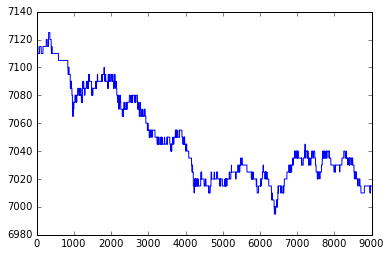

In [58]:
plot(a)

In [10]:
def train_test_to_csv(month,day,traded_time):
    data_UP,data_DOWN,len_ = data(month,day,traded_time)
    path_up = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/Train_Test_Data/ML_data_2014'\
            +'_'+str(month)+'_'+str(day)+'_'+'UP'+'.csv'
    path_down = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/Train_Test_Data/ML_data_2014'\
            +'_'+str(month)+'_'+str(day)+'_'+'DOWN'+'.csv'
    data_UP.to_csv(path_up, index = False)
    data_DOWN.to_csv(path_down, index = False)    

In [22]:
day_trade_1 = [2,3,6,7,8,10,13,14,15,16,17,20,21,22,23,24,27,28,29,30]

In [23]:
for i in day_trade_1:
    print i
    train_test_to_csv(1,i,600)

2
46683
3
62044
6
63705
7
61692
8
69391
10
66714
13
63885
14
65478
15
54647
16
56664
17
73068
20
64396
21
66853
22
70454
23
50831
24
63207
27
50063
28
50627
29
25308
30
38741


In [24]:
day_trade_2 = [7,10,11,12,13,17,18,19,21,24,25,26,27]

In [25]:
for i in day_trade_2:
    print i
    train_test_to_csv(2,i,600)

7
47312
10
58239
11
49717
12
52838
13
47850
17
57541
18
59639
19
67225
21
63295
24
81482
25
69004
26
55271
27
38425


In [55]:
day_trade_3 = [3,4,5,6,7,10,11,13,14,17,18,19,20,24,25,26,27,31]

In [56]:
for i in day_trade_3:
    print i
    train_test_to_csv(3,i,600)

3
80570
4
68882
5
66241
6
79813
7
79416
10
79120
11
69802
13
82504
14
59483
17
78237
18
51372
19
85258
20
92625
24
100404
25
87810
26
73192
27
89555
31
72197
